In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Fuente y carga de datos

Se utilizará un dataset de delay o retraso de vuelos disponible en: https://www.kaggle.com/datasets/giovamata/airlinedelaycauses

El dataset consta con vuelos del 2008, con toda su información de departure y arrival y si dicho vuelo sufrió de un retraso

Carga de datos
IMPORTANTE: no incluyo el csv a github, ya que no deja por superar los 100 MB, dejo el link arriba desde donde se puede descargar

In [2]:
data = pd.read_csv("DelayedFlights.csv") # carga de datos
data.drop(["Unnamed: 0"], axis=1, inplace=True)
data.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Hay 1936758 vuelos (una fila por vuelo) y 30 columnas

In [4]:
data.shape

(1936758, 30)

Columnas presentes

In [23]:
data.columns.to_list()

['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'DepTime',
 'CRSDepTime',
 'ArrTime',
 'CRSArrTime',
 'UniqueCarrier',
 'FlightNum',
 'TailNum',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'Origin',
 'Dest',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']

# Descripción de columnas

## Columnas de temporalidad

Como se puede ver del resumen anterior y del top 5 filas, existen varias columnas asociadas al tiempo del vuelo, tanto del departure (despegue) y arrival (llegada). Acá se identifican:

- Year (int): año del vuelo
- Month (int): mes del vuelo
- DayofMonth (int): día del mes del departure del vuelo
- DayOfWeek (int): día de la semana del vuelo (lunes, martes, ..., domingo)
- DepTime (int): Hora real del departure
- CRSDepTime (int): Hora del departure programada
- ArrvTime (int): Hora real del arrival
- ActualElapsedTime (int): tiempo (en minutos) programado desde el cierre de puerta en el aeropuerto de origen hasta la apertura en el destino
- CRSElapsedTime (int): Idem columna anterior, pero el valor real
- AirTime (int): tiempo real de vuelo en minutos
- TaxiIn (int): corresponde al tiempo en minutos que le toma a la aeronave desde que toca tierra en el aeropuerto de destino hasta que se detiene
- TaxiOut (int): corresponde al tiempo en minutos que le toma a la aeronave desde que suelta los frenos en el aeropuerto de origen hasta que se eleva y deja tierra


Se identifica que las 4 primeras columnas dada su naturaleza son discretas, examinamos su contenido:

In [5]:
def custom_value_count(data: pd.DataFrame, col: str, sort_by_index = True):
    """
    custom_value_count
    Imprime la cantidad y proporcion por categoría para una columna dada
    """
    if sort_by_index:
        print(
        pd.concat((
        data[col].value_counts(ascending=False, sort=True).sort_index(),
        data[col].value_counts(ascending=False, sort=True, normalize = True).sort_index()
        ), axis = 1))
    else:
        print(
        pd.concat((
        data[col].value_counts(ascending=False, sort=True),
        data[col].value_counts(ascending=False, sort=True, normalize = True)
        ), axis = 1))



Se puede ver que la totalidad de los vuelos son de 2008

In [85]:
custom_value_count(data, "Year")

        count  proportion
Year                     
2008  1936758         1.0


Cada mes tiene al menos un 5% de participación

In [86]:
custom_value_count(data, "Month")

        count  proportion
Month                    
1      183527    0.094760
2      189534    0.097861
3      200842    0.103700
4      155264    0.080167
5      153072    0.079035
6      200914    0.103737
7      182945    0.094459
8      162648    0.083980
9       95539    0.049329
10     103525    0.053453
11     105563    0.054505
12     203385    0.105013


Las proporciones de los días del mes son más bajas (menores a un 5%), debido a que puede tomar valores entre el 1 y el 31

In [89]:
custom_value_count(data, "DayofMonth")

            count  proportion
DayofMonth                   
1           67815    0.035015
2           63339    0.032704
3           60389    0.031180
4           62682    0.032364
5           60000    0.030980
6           61814    0.031916
7           67478    0.034841
8           62979    0.032518
9           62057    0.032042
10          63385    0.032727
11          63331    0.032699
12          61517    0.031763
13          61278    0.031639
14          64407    0.033255
15          65587    0.033864
16          61152    0.031574
17          63110    0.032585
18          65132    0.033629
19          64470    0.033288
20          65071    0.033598
21          70168    0.036230
22          71649    0.036994
23          63320    0.032694
24          64202    0.033149
25          59056    0.030492
26          62549    0.032296
27          65374    0.033754
28          61093    0.031544
29          56893    0.029375
30          56721    0.029287
31          38740    0.020002


Al igual que el mes, se puede ver que los días de la semana cada uno tiene un porcentaje considerable de participación. Todos los días de la semana tienen más de un 10% de participación

In [88]:
custom_value_count(data, "DayOfWeek")

            count  proportion
DayOfWeek                    
1          290933    0.150216
2          260943    0.134732
3          262805    0.135693
4          289451    0.149451
5          323259    0.166907
6          223256    0.115273
7          286111    0.147727


Se corroboran estas proporciones mediante gráficos de barra, donde se ve que en efecto los vuelos son solo de 2008 y las otras 3 variables tienen los valores descritos anteriormente con bajas y alzas en participación, lo cual puede depender de la estación (lo cual incide en que se oferten más o menos vuelos). Ejemplos de esto último son que entre Septiembre y Noviembre hay notoriamente menos vuelos, al igual que los últimos días de mes

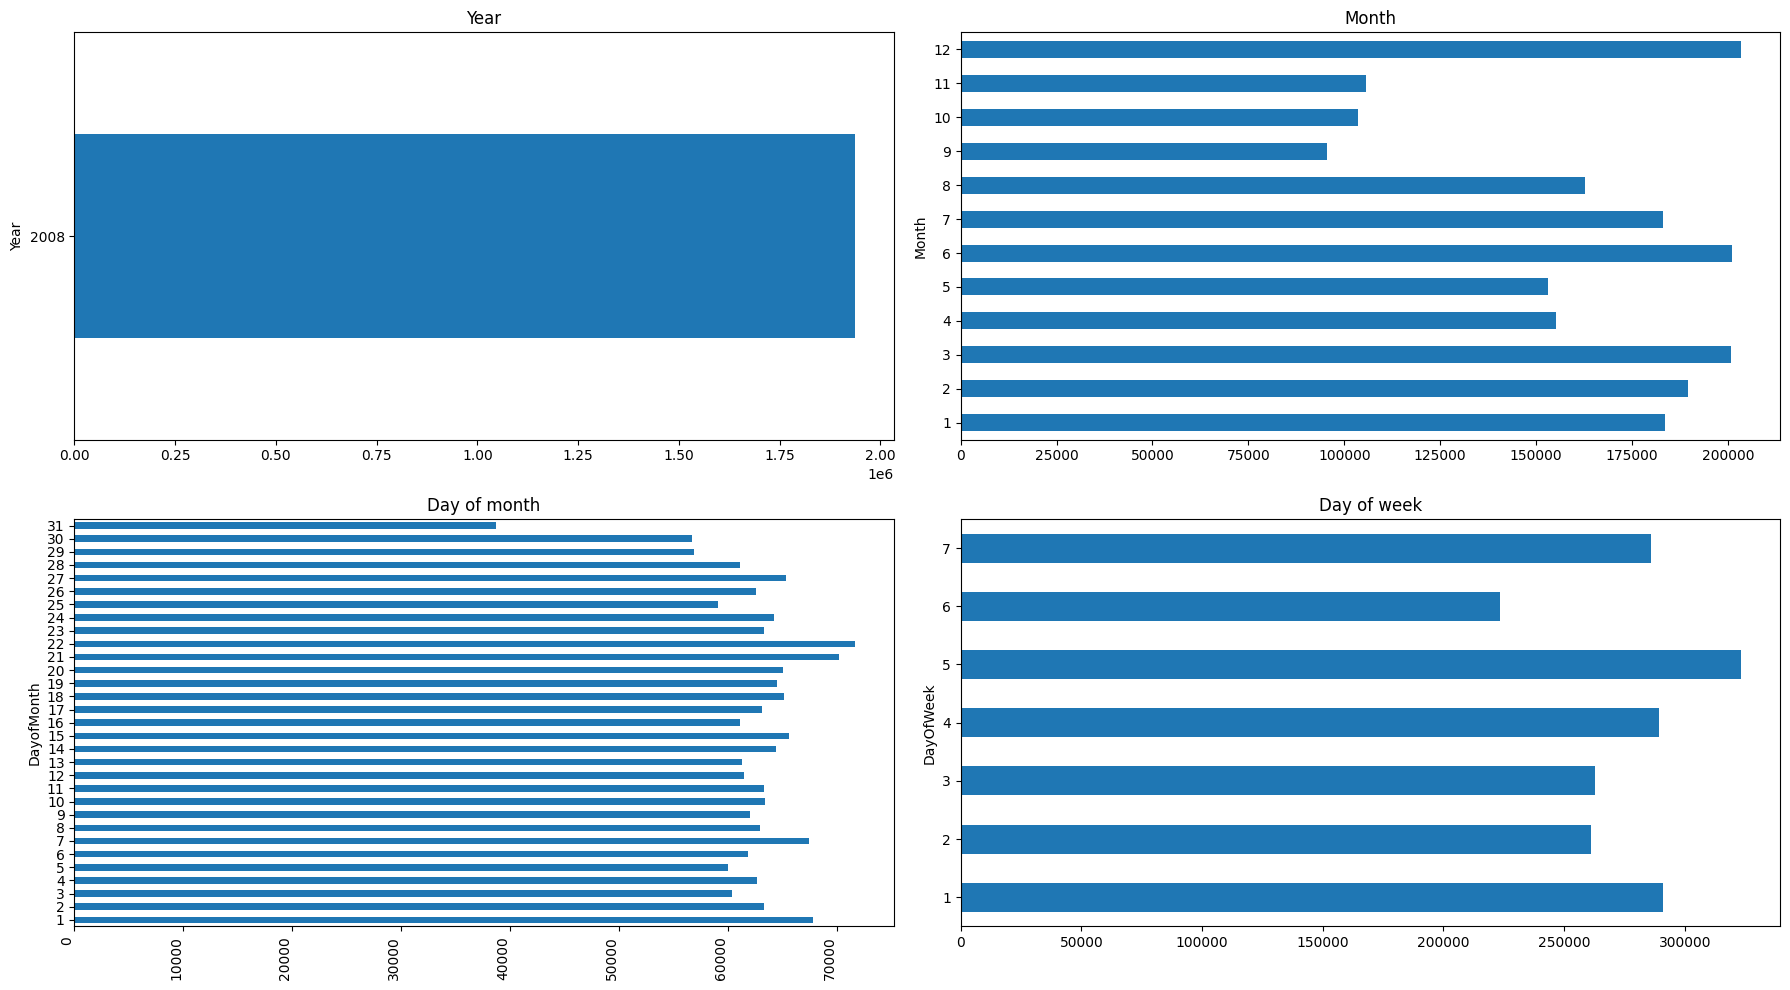

In [103]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
data["Year"].value_counts(ascending=False).sort_index().plot(kind='barh', ax=ax[0, 0])
data["Month"].value_counts(ascending=False).sort_index().plot(kind='barh', ax=ax[0, 1])
data["DayofMonth"].value_counts(ascending=False).sort_index().plot(kind='barh', ax=ax[1, 0])
data["DayOfWeek"].value_counts(ascending=False).sort_index().plot(kind='barh', ax=ax[1, 1])
ax[0, 0].set_title("Year")
ax[0, 1].set_title("Month")
ax[1, 0].set_title("Day of month")
ax[1, 1].set_title("Day of week")
plt.setp(ax[1, 0].get_xticklabels(), rotation=90, ha='right')
plt.tight_layout()

Las columnas "DepTime", "CRSDepTime" y "ArrTime" que representan una hora, pueden tomar cualquier valor entero entre 0 y 2400 (en vez de un texto del estilo "HH:MM" como "00:00" o "01:30"), lo cual se denomina formato militar de hora. Examinamos su contenido con describe, ya que pueden tomar 2401 valores posibles:

In [11]:
data[["DepTime", "CRSDepTime", "ArrTime"]].describe()

,DepTime,CRSDepTime,ArrTime
count,1.936758e+06,1.936758e+06,1.929648e+06
mean,1.518534e+03,1.467473e+03,1.610141e+03
std,4.504853e+02,4.247668e+02,5.481781e+02
min,1.000000e+00,0.000000e+00,1.000000e+00
25%,1.203000e+03,1.135000e+03,1.316000e+03
50%,1.545000e+03,1.510000e+03,1.715000e+03
75%,1.900000e+03,1.815000e+03,2.030000e+03
max,2.400000e+03,2.359000e+03,2.400000e+03


Se puede ver que en efecto los máximos rondan 2400 y los mínimos rondan el 0 y las 3 columnas comparten media, desviación estándar y percentiles muy similares, por lo cual barren intervalos horarios muy similares. Si se examinan a nivel de histogramas se corrobora lo descrito anteriormente y que los valores aproximadamente en el rango [0, 1000] tienden a ser minoritarios respecto a valores mayores a 1000, esto de debe a que entre 0 y 1000 incluye todo el horario de madrugada, donde existen menos vuelos

C:\Users\Diego\AppData\Local\Temp\ipykernel_10340\4040585200.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data[["DepTime", "CRSDepTime", "ArrTime"]].hist(ax=ax)


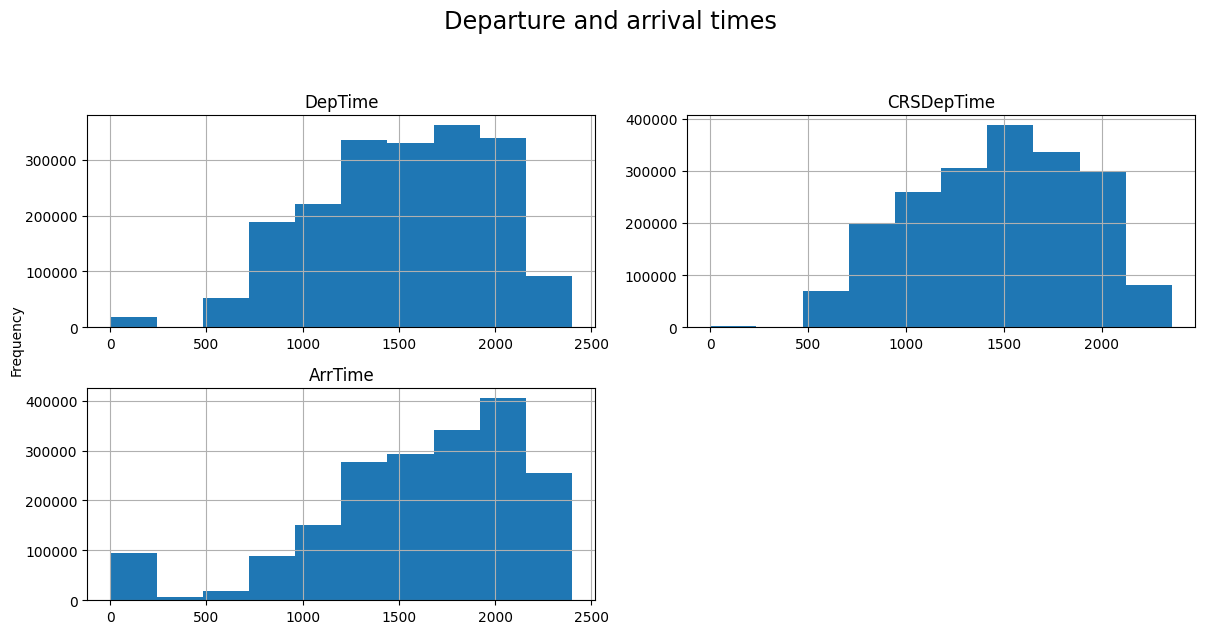

In [41]:
fig, ax = plt.subplots(sharex=False, sharey=False, figsize=(12,6))
data[["DepTime", "CRSDepTime", "ArrTime"]].hist(ax=ax)
fig.text(0, 0.5, "Frequency", va="center", rotation="vertical")
plt.suptitle("Departure and arrival times", x=0.5, y=1.05, ha="center", fontsize="xx-large")
plt.tight_layout()

Respecto de valores faltantes, se puede ver que los tiempos de despegue tanto real como programado no tienes valores faltantes, mientras que los tiempos de llegada tienen 7110 valores faltantes. Esto muestra que existe una tasa de pérdida de datos que ocurre solo en la llegada y no en los despegues

In [16]:
data[["DepTime", "CRSDepTime", "ArrTime"]].isna().sum()

DepTime          0
CRSDepTime       0
ArrTime       7110
dtype: int64

Se hace lo propio para las variables que representan tiempos de vuelo, observando que para las variables ActualElapsedTime, CRSElapsedTime y Airtime se observan histogramas similares cargados hacia la izquierda, ya que se trata en general de vuelos de corta duración. Las variables de TaxiIn y TaxiOut tienden a tener menor variabilidad concentrando la mayor parte cercana a 0

C:\Users\Diego\AppData\Local\Temp\ipykernel_2268\80538573.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data[["ActualElapsedTime", "CRSElapsedTime", "AirTime", "TaxiIn", "TaxiOut"]].hist(ax=ax)


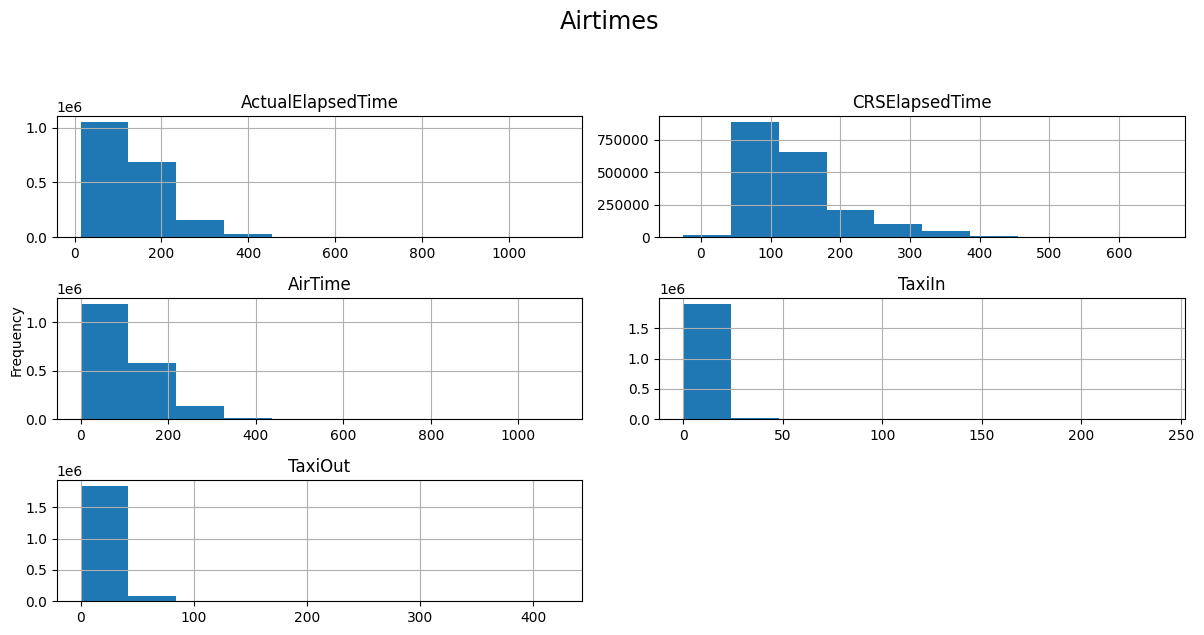

In [7]:
fig, ax = plt.subplots(sharex=False, sharey=False, figsize=(12,6))
data[["ActualElapsedTime", "CRSElapsedTime", "AirTime", "TaxiIn", "TaxiOut"]].hist(ax=ax)
fig.text(0, 0.5, "Frequency", va="center", rotation="vertical")
plt.suptitle("Airtimes", x=0.5, y=1.05, ha="center", fontsize="xx-large")
plt.tight_layout()

Un detalle que se observa en la columna CRSElapsedTime es que posee valores negativos, lo cual no puede ser posible para ser un tiempo de vuelo. Se examinan cuántos son en la celda inmediatamente abajo, notando que son solo 6 casos de los casi 2 millones de vuelos, por lo que deben considerarse como casos anómalos (errores de medición por ejemplo)

In [15]:
data[data["CRSElapsedTime"]<0]

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
241588,768964,2008,2,3,7,1747.0,1638,NaN,1729,OO,...,NaN,29.0,0,N,1,NaN,NaN,NaN,NaN,NaN
437861,1358057,2008,3,8,6,1839.0,1756,1910.0,1735,OO,...,1.0,7.0,0,N,0,0.0,0.0,0.0,0.0,95.0
625830,1992427,2008,4,11,5,725.0,710,NaN,645,OO,...,NaN,8.0,0,N,1,NaN,NaN,NaN,NaN,NaN
625869,1992500,2008,4,11,5,610.0,600,NaN,648,OO,...,NaN,10.0,0,N,1,NaN,NaN,NaN,NaN,NaN
944846,3171278,2008,6,5,4,634.0,600,NaN,650,OO,...,NaN,9.0,0,N,1,NaN,NaN,NaN,NaN,NaN
944848,3171282,2008,6,5,4,644.0,600,NaN,642,OO,...,NaN,10.0,0,N,1,NaN,NaN,NaN,NaN,NaN


Examinando los valores faltantes en esas 3 variables, se puede ver que ActualElapsedTime y AirTime presentan una cantidad no menor de valores faltantes (superando los 8000 casos). Por otro lado, CRSElapsedTime tiene una cantidad de valores faltantes mucho menor. Finalmente, para las variables TaxiIn y TaxiOut, en ambas existen valores faltantes, notando que existe una cantidad mucho mayor en TaxiIn. Esto último, da cuenta que se pierden muchos más datos temporales (medidos en tiempo real) en la llegada al destino que en la salida desde el origen

In [8]:
data[["ActualElapsedTime", "CRSElapsedTime", "AirTime", "TaxiIn", "TaxiOut"]].isna().sum()

ActualElapsedTime    8387
CRSElapsedTime        198
AirTime              8387
TaxiIn               7110
TaxiOut               455
dtype: int64

## Columnas de retrasos
Este tipo de columna corresponde a distintos tipos de retrasos medidos en minutos de cada vuelo. Las columnas son:

- ArrDelay (int): retraso real en minutos en la llegada de cada vuelo al aeropuerto de destino
- DepDelay (int): retraso real en minutos en el despegue de cada vuelo desde el aeropuerto de origen
- CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay (todos int): son retrasos debidos a distintas razones puntuales menos frecuentes. En el orden que fueron mencionadas estas corresponden a condiciones del transportista/carrier que pueden tener relación con limpieza y mantención de la aeronave, condiciones climáticas infrecuentes que dificulten el vuelo, ordenadas por National Airspace System (NAS), de seguridad (evacuaciones) u operacionales (atada a atrasos de vuelos anteriores por ejemplo)

Como no son variables categóricas, se analiza su contenido primeramente con describe. Se puede ver que las columnas ArrDelay y DepDelay comparten estadísticas similares. Ambos tienen una media aprox. de 42 minutos de retraso, una mediana idéntica de 24 minutos y desviaciones también similares. El resto de delays se puede ver que no tienen aparentemente ninguna similitud y en el caso de WeatherDelay y SecurityDelay los percentiles 25 y 75 son ambos 0, lo cual da cuenta que deben existir muy pocos retrasos de este tipo registrados.

In [17]:
delay_columns = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
data[delay_columns].describe()

,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.928371e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,4.219988e+01,4.318518e+01,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,5.678472e+01,5.340250e+01,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,-1.090000e+02,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.400000e+01,2.400000e+01,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,5.600000e+01,5.300000e+01,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,2.461000e+03,2.467000e+03,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


Inspeccionando los valores faltantes en estas columnas se puede ver que los retrasos de despegue no tienen valores faltantes. Los retrasos en el tiempo de llegada tienen 8387 valores faltantes que coinciden con los valores faltantes descritos con anterioridad en las variables de tiempos de vuelo, dando nuevamente evidencias de un error en la captura o medición de los tiempos en la llegada o aterrizaje. El resto de retrasos contienen 689270 valores faltantes que representa aprox. un 35% de los datos, un porcentaje muy alto de valores vacíos, esto dificulta enormemente poder darle un uso práctico a estas variables

In [18]:
data[delay_columns].isna().sum()

ArrDelay               8387
DepDelay                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

Como histogramas se puede observar, que todas estas variables comparten que concentran prácticamente la mayoría de los datos exactamente igual a 0 o muy cercanos. Esto da cuenta que independientemente de los valores faltantes, cuando si se tienen datos de delays, estos son inexistentes (vuelos a tiempo) o los atrasos son en general bajos

C:\Users\Diego\AppData\Local\Temp\ipykernel_10340\2594965067.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data[delay_columns].hist(ax=ax)


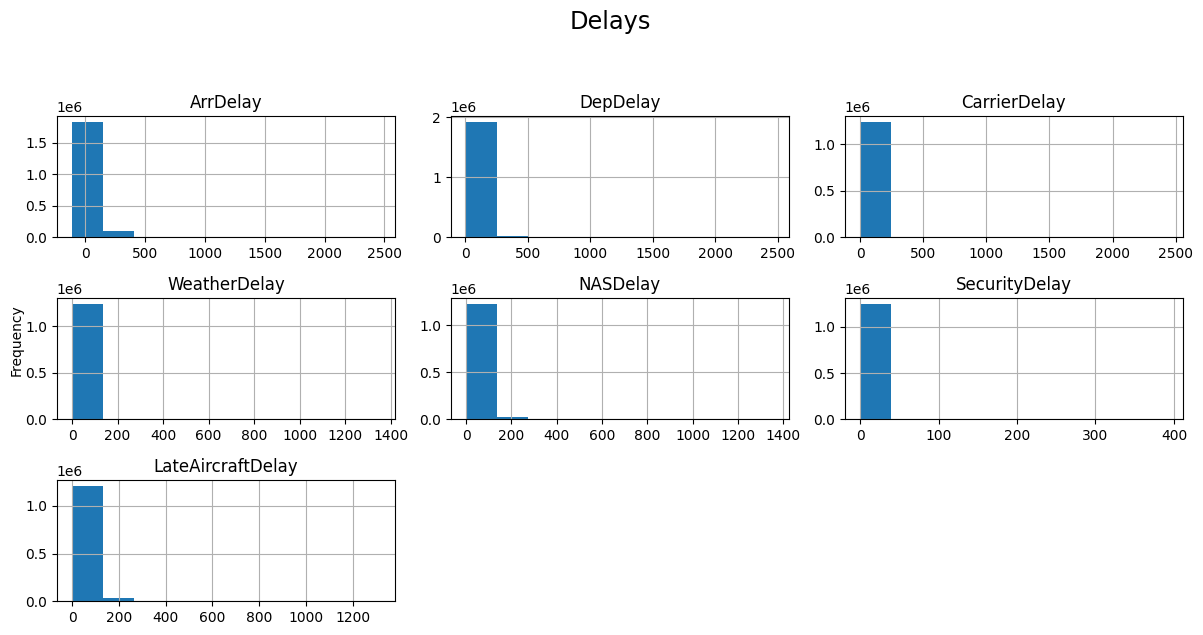

In [36]:
fig, ax = plt.subplots(sharex=False, sharey=False, figsize=(12,6))
data[delay_columns].hist(ax=ax)
fig.text(0, 0.5, "Frequency", va="center", rotation="vertical")
plt.suptitle("Delays", x=0.5, y=1.05, ha="center", fontsize="xx-large")
plt.tight_layout()

## Columnas de origen y destino
Corresponden a las siguientes 3 columnas:

- Origin (str): Aeropuerto de origen
- Dest (str): Aeropuerto de destino
- Distance (float): Distancia que conecta ambos aeropuertos en kms

Se visualizan las cantidades y proporciones presentes en origen y destino. Se puede ver que existen 303 y 304 aeropuertos diferentes respectivamente, donde los aeropuertos más predominantes superan los 100,000 vuelos  (ATL en Atlanta y ORD en Chicago por ejemplo). Por otro lado, existen aeropuertos con escasa participación en 1 solo vuelo por ejemplo

In [90]:
custom_value_count(data, "Origin", sort_by_index=False)

         count    proportion
Origin                      
ATL     131613  6.795532e-02
ORD     125979  6.504633e-02
DFW      95414  4.926480e-02
DEN      74323  3.837495e-02
LAX      58772  3.034556e-02
...        ...           ...
BJI          4  2.065307e-06
PIR          3  1.548980e-06
PUB          2  1.032654e-06
TUP          1  5.163268e-07
INL          1  5.163268e-07

[303 rows x 2 columns]


In [93]:
custom_value_count(data, "Dest", sort_by_index=False)

       count    proportion
Dest                      
ORD   108984  5.627136e-02
ATL   106898  5.519430e-02
DFW    70657  3.648210e-02
DEN    63003  3.253014e-02
LAX    59969  3.096360e-02
...      ...           ...
INL        9  4.646941e-06
PIR        3  1.548980e-06
OGD        1  5.163268e-07
TUP        1  5.163268e-07
CYS        1  5.163268e-07

[304 rows x 2 columns]


Se muestran el top y tail 5 de aeropuertos de origen y destinos, ya que no se pueden visualizar todos debido a su gran número

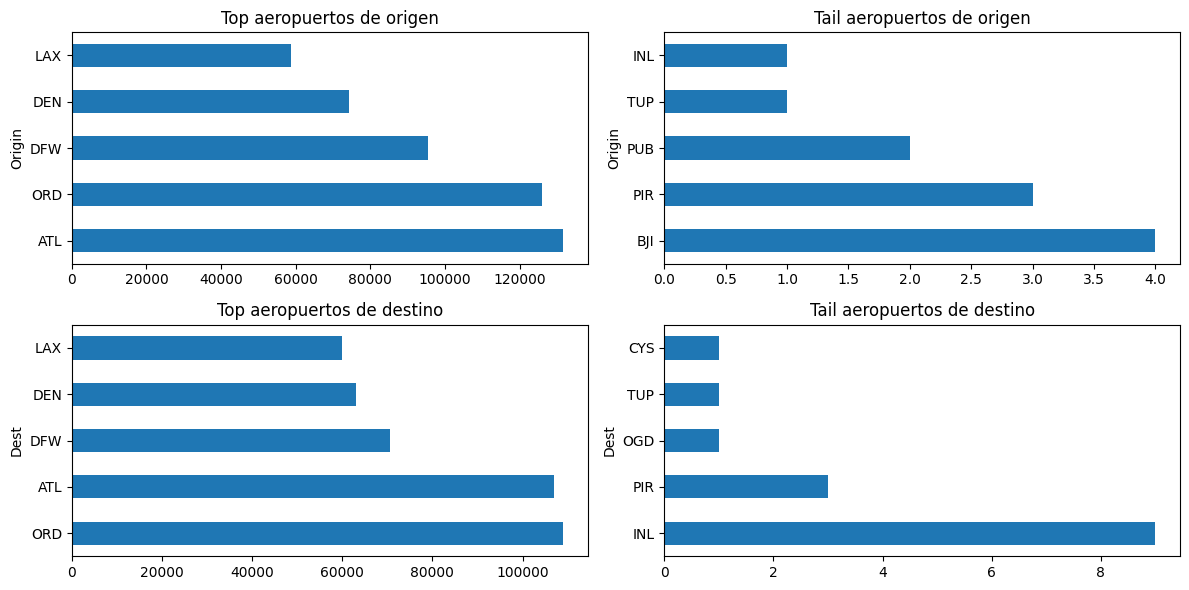

In [94]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
data["Origin"].value_counts(ascending=False).head(5).plot(kind='barh', ax=ax[0, 0])
data["Origin"].value_counts(ascending=False).tail(5).plot(kind='barh', ax=ax[0, 1])
data["Dest"].value_counts(ascending=False).head(5).plot(kind='barh', ax=ax[1, 0])
data["Dest"].value_counts(ascending=False).tail(5).plot(kind='barh', ax=ax[1, 1])
ax[0, 0].set_title("Top aeropuertos de origen")
ax[0, 1].set_title("Tail aeropuertos de origen")
ax[1, 0].set_title("Top aeropuertos de destino")
ax[1, 1].set_title("Tail aeropuertos de destino")
plt.tight_layout()

Mediante un histograma y estadísticos en la variable de distancia, se puede ver que en general el dataset concentra vuelos cortos de menos de 1000 km de distancia, disminuyendo progresivamente sobre este valor

In [95]:
data["Distance"].describe()

count    1.936758e+06
mean     7.656862e+02
std      5.744797e+02
min      1.100000e+01
25%      3.380000e+02
50%      6.060000e+02
75%      9.980000e+02
max      4.962000e+03
Name: Distance, dtype: float64

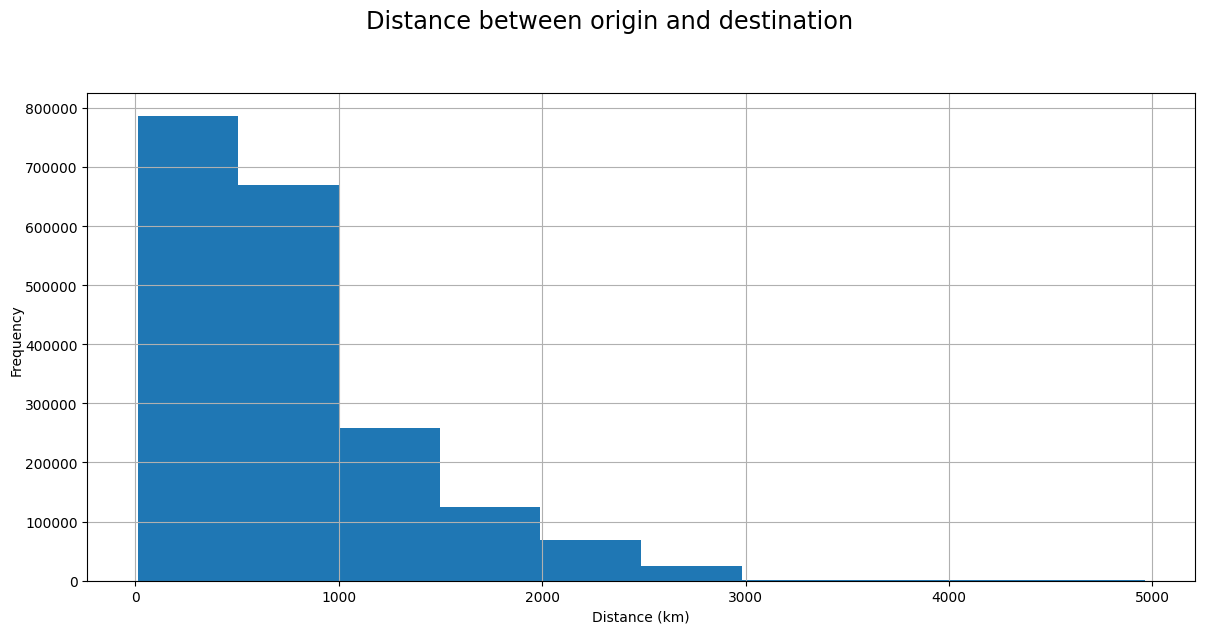

In [48]:
fig, ax = plt.subplots(sharex=False, sharey=False, figsize=(12,6))
data["Distance"].hist(ax=ax)
ax.set_xlabel("Distance (km)")
fig.text(0, 0.5, "Frequency", va="center", rotation="vertical")
plt.suptitle("Distance between origin and destination", x=0.5, y=1.05, ha="center", fontsize="xx-large")
plt.tight_layout()

Como se puede ver, no existen valores faltantes en estas columnas, lo cual habla de que los datos en sí tienen al menos la información básica descriptiva de cada vuelo, ya que el origen, destino y distancia son variables definidas evidentemente antes del vuelo y no son "medidas" como puede ser el caso de los tiempos de vuelo

In [113]:
data[["Origin", "Dest", "Distance"]].isna().sum()

Origin      0
Dest        0
Distance    0
dtype: int64

## Columnas descriptivas
Existen columnas que describen al vuelo mismo y a la aeronave que realiza el vuelo
- FlightNum (int): corresponde a una etiqueta numérica a cada vuelo
- TailNum (str): etiqueta de la aeronave que realiza el vuelo
- UniqueCarrier (str): corresponde a un código que representa a las partes o aerolíneas a cargo de operar cada vuelo

Se analiza primero el contenido de FlightNum observando que hay 7499 valores diferentes entre 1 y 9742, por lo que existen números de vuelo repetidos

In [106]:
custom_value_count(data, "FlightNum")

           count    proportion
FlightNum                     
1            860  4.440410e-04
2            985  5.085819e-04
3           1078  5.566003e-04
4            818  4.223553e-04
5            785  4.053165e-04
...          ...           ...
8403           1  5.163268e-07
9002           1  5.163268e-07
9740          13  6.712248e-06
9741           4  2.065307e-06
9742           1  5.163268e-07

[7499 rows x 2 columns]


Para la columna TailNum se analizan también las proporciones, notando que existen 5366 aeronaves etiquetadas diferente y una en particular es "Unknow", que implica se interpreta como un valor desconocido

In [110]:
custom_value_count(data, "TailNum")

         count  proportion
TailNum                   
80009E     387    0.000200
80019E     351    0.000181
80059E     385    0.000199
80129E     412    0.000213
80139E     375    0.000194
...        ...         ...
N998DL     376    0.000194
N999CA      73    0.000038
N999DN     394    0.000203
NHZOAL      32    0.000017
Unknow       3    0.000002

[5366 rows x 2 columns]


Para el carrier se puede ver que son 20 aerolíneas, con participaciones en general similares con algunas excepciones (por ejemplo el carrier AQ y el HA). Las mayoritarias son WN y AA (las populares mundialmente SouthWest Airlines y American Airlines), por lo cual tiene sentido que sean las aerolíneas con mayor presencia de vuelos.

In [17]:
custom_value_count(data, "UniqueCarrier", sort_by_index=False)

                count  proportion
UniqueCarrier                    
WN             377602    0.194966
AA             191865    0.099065
MQ             141920    0.073277
UA             141426    0.073022
OO             132433    0.068379
DL             114238    0.058984
XE             103663    0.053524
CO             100195    0.051733
US              98425    0.050819
EV              81877    0.042275
NW              79108    0.040846
FL              71284    0.036806
YV              67063    0.034626
B6              55315    0.028561
OH              52657    0.027188
9E              51885    0.026790
AS              39293    0.020288
F9              28269    0.014596
HA               7490    0.003867
AQ                750    0.000387


En cuanto a valores faltantes, existen 5 vuelos con el campo TailNum vacío y todos los vuelos tienen asociado un número FlightNum y un UniqueCarrier

In [16]:
data[["FlightNum", "TailNum", "UniqueCarrier"]].isna().sum()

FlightNum        0
TailNum          5
UniqueCarrier    0
dtype: int64

## Columnas de cancelaciones

- Cancelled (int): es un entero 0 o 1, dependiendo si el vuelo se canceló o no
- CancellationCode (str): corresponde a un código de tipo de cancelación, donde N representa que no existió cancelación

En las 2 celdas posteriores se muestran primero las proporciones. Para la variable Cancelled, se observa que apenas 633 vuelos presentes en el dataset corresponden a vuelos cancelados, lo cual no representa ni siquiera un 1%. De la variable categórica CancellationCode, se puede ver que existen 3 códigos de motivos de cancelación, donde el minoritario es en la categoría C.

In [11]:
custom_value_count(data, "Cancelled")

             count  proportion
Cancelled                     
0          1936125    0.999673
1              633    0.000327


In [13]:
custom_value_count(data, "CancellationCode")

                    count  proportion
CancellationCode                     
A                     246    0.000127
B                     307    0.000159
C                      80    0.000041
N                 1936125    0.999673


No se observan valores faltantes en las variables de cancelaciones

In [14]:
data[["Cancelled", "CancellationCode"]].isna().sum()

Cancelled           0
CancellationCode    0
dtype: int64

# Correlaciones
Se analizan correlaciones, con el fin de identificar tendencias relevantes entre columnas y darles una interpretación. Se excluyen variables categóricas como el Carrier o códigos de cancelaciones y también variables que por su naturaleza no tiene un sentido lógico incluirlas en la matriz de correlaciones

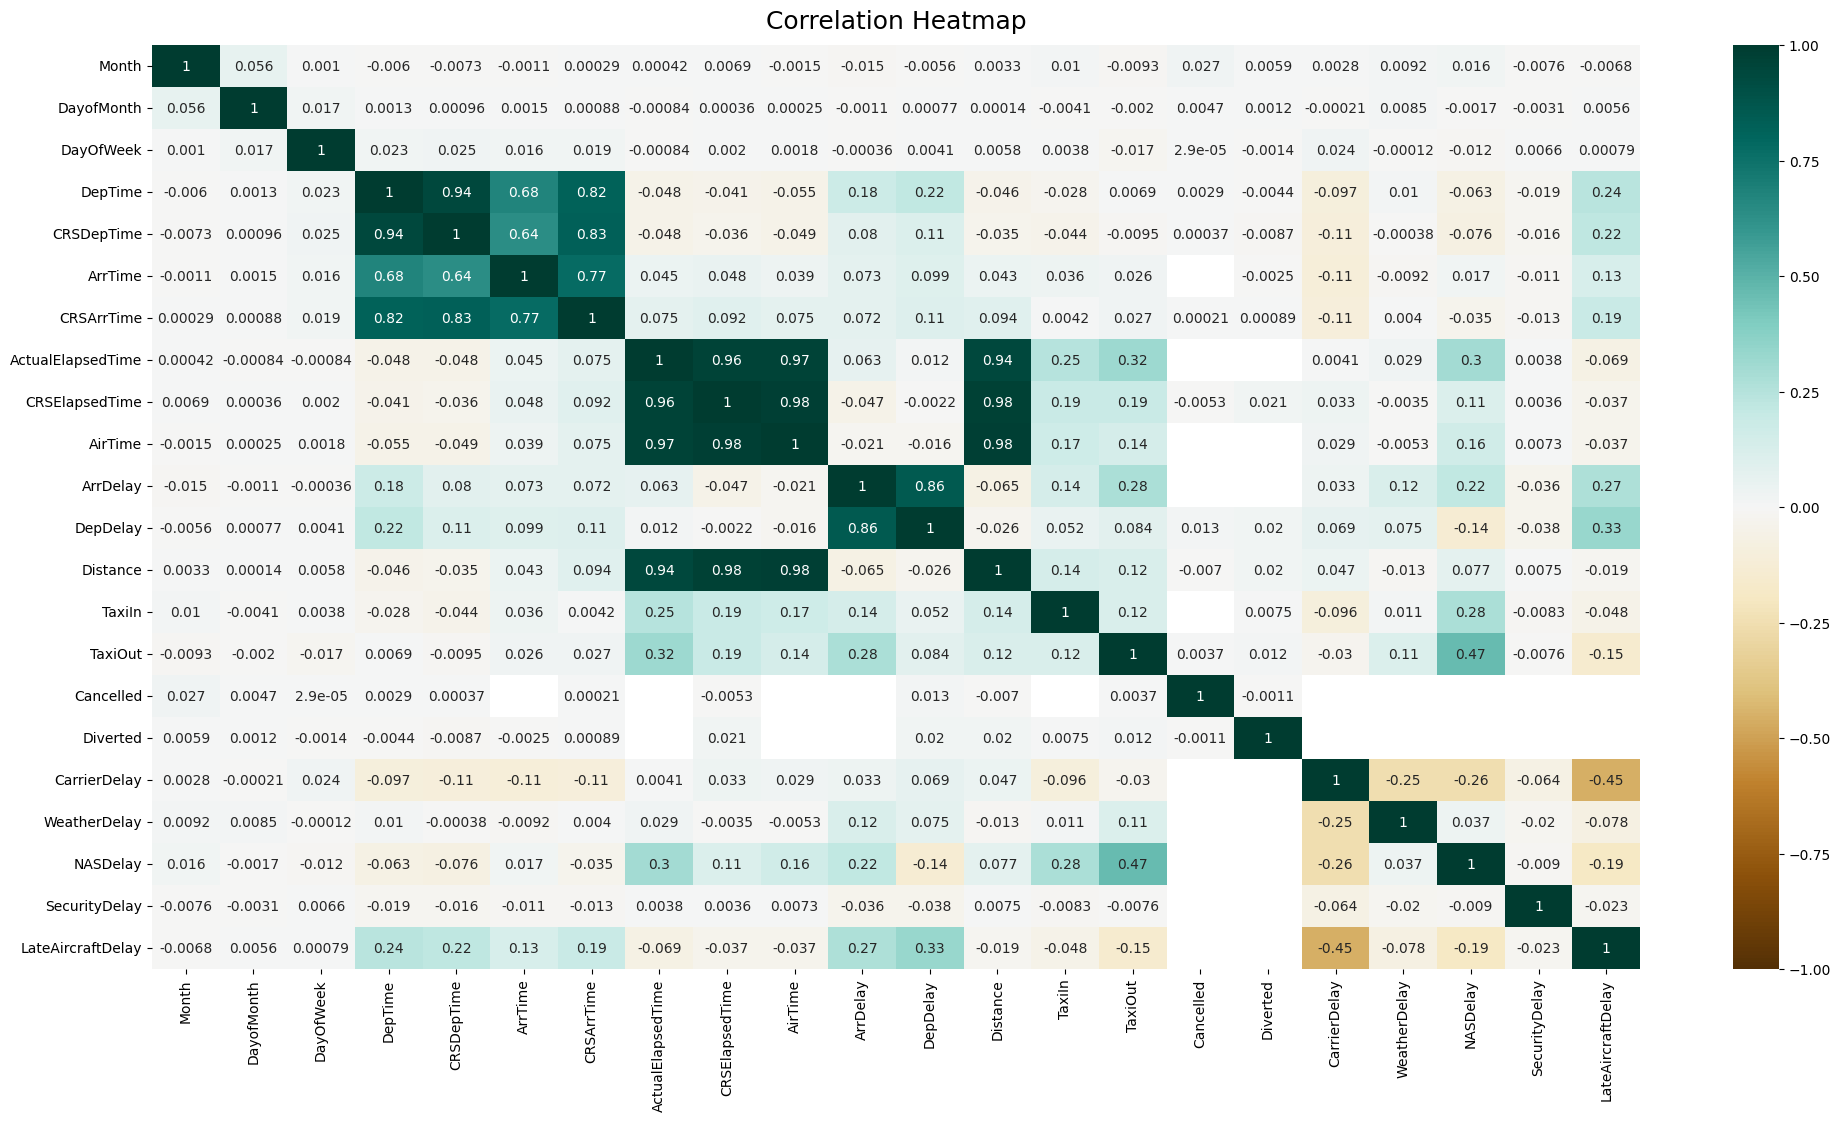

In [30]:
exclude_cols = ["Year", "FlightNum"] #El año se excluye porque son solo vuelos del 2008 y el número de vuelo porque tiene solo un fin descriptivo por vuelo
corrs = data.drop(exclude_cols, axis=1, inplace=False).copy().corr(numeric_only=True, method="spearman")

plt.figure(figsize=(24, 12))
heatmap = sns.heatmap(corrs, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

Los espacios en blanco dan cuenta de casos donde no fue posible calcular la correlación dada la gran cantidad de valores faltantes. Las principales observaciones de la matriz son:

- Correlaciones >= 0.9: Por ejemplo la distancia con las 3 variables de tiempos de vuelo (ActualEllapsedTime, CRSEllapsedTime y AirTime) tienen correlaciones muy altas, lo cual se explica porque evidentemente a mayor distancia entre origen y destino mayores son los tiempos de vuelo. Otro ejemplo, se da entre DepTime y CRSDepTime, lo cual es también evidente porque ambas representan lo mismo (hora de despegue), solo que un caso es la hora real de despegue y el otro la hora programada de despegue (en muchos casos son iguales).
- Correlaciones altas, pero menores a 0.9: se observa por ejemplo correlaciones entre 0.6 y 0.8 entre las variables de tiempo de despegue y de llegada, lo cual es evidente, ya que mientras más tarde se despega, más tarde se llega.
- Correlaciones apreciables, pero no extremadamente altas (aprox entre 0.20 y 0.4): se observan por ejemplo correlaciones apreciables positivas entre TaxiIn y TaxiOut con el NASDelay. Otro ejemplo es entre el DepDelay y el DepTime, lo cual da cuenta que los retrasos de los vuelos están de cierta forma favorecidos por ciertos bloques horarios. Esto último ocurre no solo con el DepDelay, sino también con otros delays como por ejemplo el LateAircraftDelay y no solo se favorecen por bloques horarios del despegue, sino también por bloques horarios en la llegada o arrival.
- Correlaciones apreciables y negativas: se observan por ejemplo correlaciones entre -0.4 y -0.2 entre los distintos tipos de delays. Estas correlaciones no son relevantes, porque primero es evidente que si se da un tipo de retraso el otro tipo será menor y además se vio anteriormente que los tipos de delays que no son DepDelay y ArrDelay tienen una cantidad muy alta de valores faltantes, por lo que algunos de estos comportamientos no son del todo fidedignos.

# Comportamientos de variables categóricas con los retrasos

Se tienen un gran número de variables categóricas temporales y el objetivo de este dataset es el análisis de los retrasos. Se vio anteriormente que los retrasos que no son ni DepDelay ni ArrDelay poseen un gran número de valores faltantes, por lo cual se analiza solo para estos 2 tipos de delay mencionados

Partiendo con el mes, se puede ver que los vuelos con retrasos más grandes (tanto de departure como de arrival), tienden a dificultar observar un comportamiento

<Axes: xlabel='Month', ylabel='ArrDelay'>

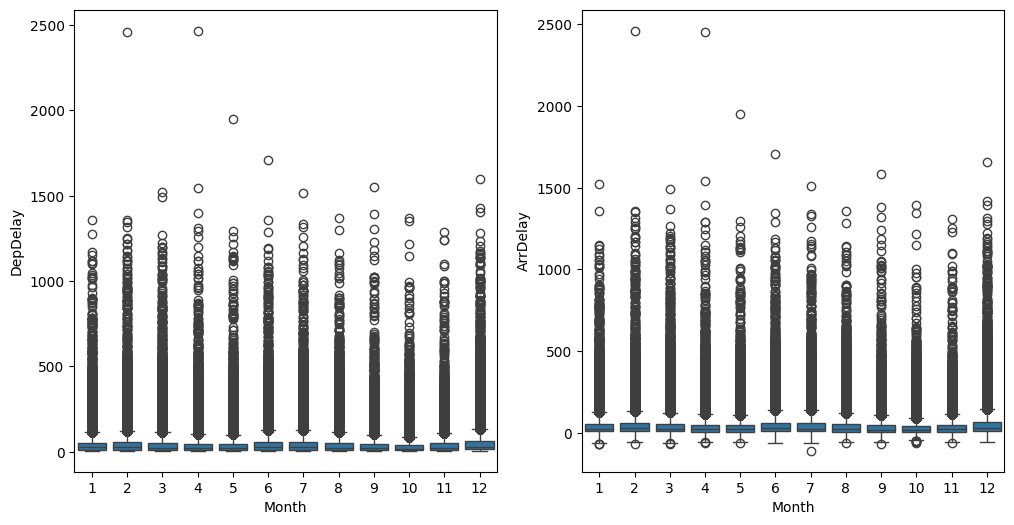

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(12,6))
sns.boxplot(data=data, x="Month", y="DepDelay", ax=ax[0])
sns.boxplot(data=data, x="Month", y="ArrDelay", ax=ax[1])

Se fija el max del eje y en 100, observando que los mayores retrasos tienden a darse en Diciembre y los menores en Octubre tanto para departure como para arrival

(0.0, 100.0)

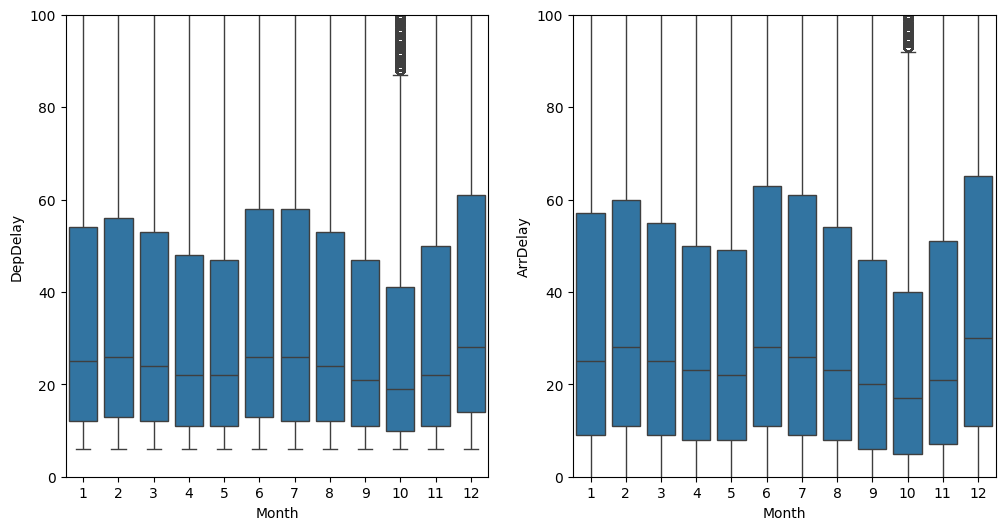

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(12,6))
sns.boxplot(data=data, x="Month", y="DepDelay", ax=ax[0])
sns.boxplot(data=data, x="Month", y="ArrDelay", ax=ax[1])
ax[0].set_ylim(0, 100)
ax[1].set_ylim(0, 100)

Se hace lo propio para el día de la semana, notando que no es posible visualizar una tendencia con los delays. Esto motiva a visualizaciones que harán posteriormente utiulizando nuevas columnas sintéticas, creadas a partir de columnas originalmente presentes en el dataset

<Axes: xlabel='DayOfWeek', ylabel='ArrDelay'>

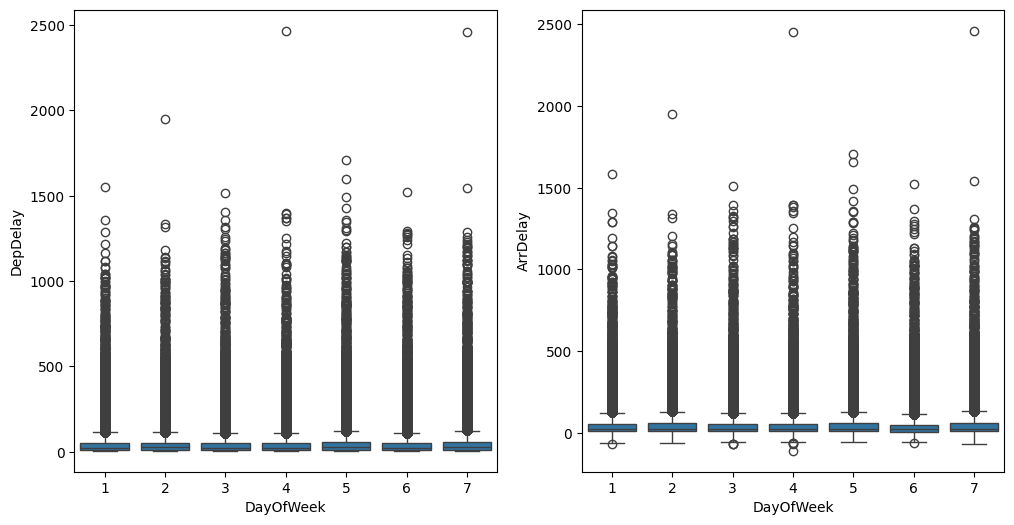

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(12,6))
sns.boxplot(data=data, x="DayOfWeek", y="DepDelay", ax=ax[0])
sns.boxplot(data=data, x="DayOfWeek", y="ArrDelay", ax=ax[1])

(0.0, 100.0)

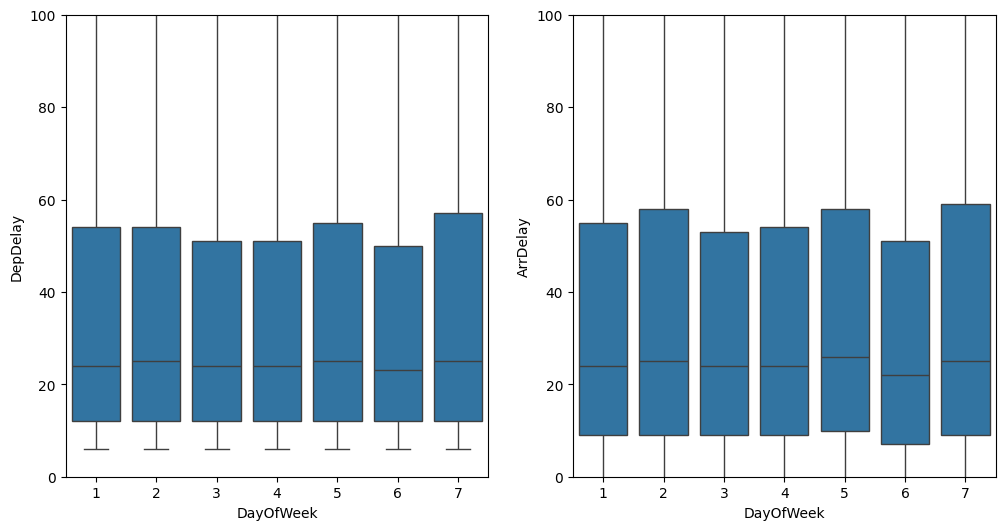

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(12,6))
sns.boxplot(data=data, x="DayOfWeek", y="DepDelay", ax=ax[0])
sns.boxplot(data=data, x="DayOfWeek", y="ArrDelay", ax=ax[1])
ax[0].set_ylim(0, 100)
ax[1].set_ylim(0, 100)